In [ ]:
pip install qiskit numpy jupyterlab matplotlib qiskit-ibmq-provider

In [ ]:
pip install pylatexenc


In [1]:
import qiskit as q
circuit =q.QuantumCircuit(2,2) #two qubits, and two classical bits

circuit.x(0) #We are going to apply a NOT gate to qubit 0
circuit.cx(0,1) #This entangles two qubits. IT flips the 2nd qubit value IF the first qubit only is a 1

circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

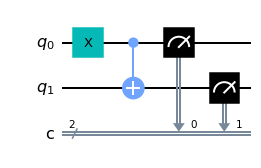

In [2]:
circuit.draw(output="mpl") #This is just another visualization of the circuit I created. 

In [7]:
from qiskit import IBMQ

IBMQ.save_account("110c4e580f5f2766662a5b5796bb5da90620e11859f57d4e69ab0aab12eeede1a8f3bfd6234b49ff2b3b1d0b1dd0ee96562ddca6c7d608aeaaca0288a38583d2")

configrc.store_credentials:WARNING:2022-12-15 18:39:59,044: Credentials already present. Set overwrite=True to overwrite.


In [9]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider(hub = "ibm-q", group='open', project='main') 

for backend in provider.backends():
  try:
    qubit_count = len(backend.properties().qubits)
  except:
    qubit_count = "simulated"
  print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

  #This just lists the various quantum machines with the queue size and the amount of qubits available

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmq_lima has 158 queued and 5 qubits
ibmq_belem has 12 queued and 5 qubits
ibmq_quito has 17 queued and 5 qubits
simulator_statevector has 2 queued and simulated qubits
simulator_mps has 2 queued and simulated qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 2 queued and simulated qubits
ibmq_manila has 9 queued and 5 qubits
ibm_nairobi has 38 queued and 7 qubits
ibm_oslo has 53 queued and 7 qubits


In [19]:
from qiskit.tools.monitor import job_monitor
backend= provider.get_backend("ibmq_belem")
job = q.execute(circuit, backend=backend, shots=500) #500 results, or the counts of the actual bit values that we returned
job_monitor(job)

Job Status: job has successfully run


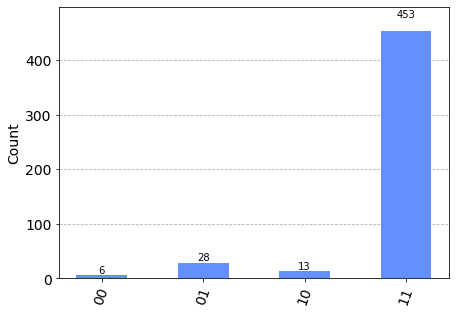

In [20]:
from qiskit.visualization import plot_histogram
result = job.result()
counts = result.get_counts(circuit)

#This is a depiction of entanglement
plot_histogram([counts])

In [29]:
backend = provider.get_backend("ibmq_qasm_simulator")
circuit =q.QuantumCircuit(2,2)

circuit.h(0)
circuit.cx(0,1)

circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [30]:
job = q.execute(circuit, backend=backend, shots=500) #500 results, or the counts of the actual bit values that we returned
job_monitor(job)

Job Status: job has successfully run


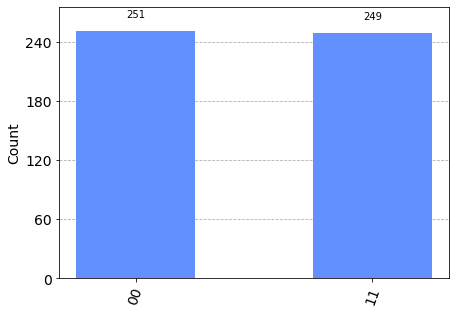

In [31]:
result = job.result()
counts = result.get_counts(circuit)

#This is the reuslt of a 'perfcect' quantum machine. 
plot_histogram([counts])